In [2]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### A/B тестирование

В этом задании вы познакомитесь с A/B тестированием и примените полученные знания по статистике. 

Рассмотрим A/B тестирование на примере сайта. У сайта есть два дизайна - старый и новый, и мы хотим оценить, насколько новый дизайн лучше старого. Для этого пользователи сайта случайным образом разделяются на контрольную и тестовую группы. Контрольной группе показывается старая версия сайта, тестовой группе - измененная версия. Оценить изменение можно несколькими способами, самый простой - оценить конверсию. Конверсия - доля пользователей, совершивших заранее определенное действие(например подписка, нажатие на кнопку, заполнение формы).

### Описание данных

Для начала нужно загрузить данные из файла `a_b_testing.csv` при помощи функции `read_csv` из библиотеки `pandas`. В данном случае 1 - была совершена подписка на сайт, 0 - подписки не было. A - контрольная группа, B - тестовая группа.

In [8]:
df = pd.read_csv('C:Downloads/a_b_testing.csv')

df_cont = df[df['group'] == 'A']
df_cont

,converted,group
0,1,A
1,0,A
2,0,A
4,1,A
7,0,A
...,...,...
3993,1,A
3994,0,A
3995,1,A
3996,0,A


In [9]:
df_test = df[df['group'] == 'B']
df_test

,converted,group
3,1,B
5,1,B
6,0,B
8,1,B
16,0,B
...,...,...
3976,1,B
3983,1,B
3985,0,B
3997,1,B


Далее нужно выполнить следующие пункты, описание выходного формата содержится внутри каждого задания.

### Доверительный интервал

В видео про доверительный интервал мы рассмотрели, как можно аппроксимировать биномиальное распределение нормальным. В некоторых случаях параметры нормального распределения можно вывести математически и ниже мы рассмотрим как.

Представим количество пользователей как случайную величину из биномиального распределения с параметрами  `n`  - количество пользователей и `p` - вероятность конверсии или как сумму  `n`  независимых бросаний монетки. Определим следующую случайную величину:

$$Y = X_{1} + X_{2} + \dots + X_{n} , \, $$
где случайная величина $X_{i}$ имеет распределение Бернулли. Для случайной величины $Y$ математическое ожидание и дисперсия равны:

$$\mu = np, \, \sigma^{2} = np\cdot(1 - p)$$

Далее применяя центральную предельную теорему(случайные величины $X_{i}$ распределены независимо и размер выборки большой), получаем что 

$$Y \sim \mathcal{N}(np \, np\cdot(1 - p))\$$

Мы перешли от биномиального распределения к нормальному. Следующий шаг - стандартизация нормального распределения:

$$Z = \frac{Y - np}{\sqrt{np\cdot(1-p)}} \sim \mathcal{N}(0, \, 1) $$ 

Преобразуем выражение выше:

$$Z = \frac{Y - np}{\sqrt{np\cdot(1-p)}} = \frac{\frac{Y}{n} - p}{\sqrt{\frac{p(1-p)}{n}}} \sim \mathcal{N}(0, \, 1) $$

Так как среднее значение по выборке - это наблюдаемый процент конверсии, то доверительный интервал будет выглядеть следующим образом:

$${P}\left(p - z_{1-\frac{\alpha}{2}} \sqrt{\frac{p(1-p)}{n}} \le \mu \le p + z_{1-\frac{\alpha}{2}}\sqrt{\frac{p(1-p)}{n}}\right) = 1-\alpha$$

### ЗАДАНИЕ

Найдите доверительный интервал для средней конверсии пользователей из контрольной выборки с уровнем значимости 95%. Округлите левую и правую границу с точностью до двух знаков после запятой. Запишите значения левой и правой границ через запятую, сохраняя приведенный порядок, в переменную `answer1`, которая будет являтся строкой.

#### РЕШЕНИЕ

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import random
from tqdm import tqdm
plt.style.use('ggplot')

confidence = 0.95

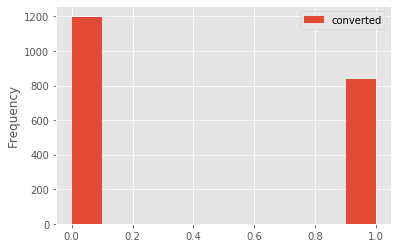

In [48]:
df_cont.plot.hist(df_cont, bins = 10)

In [49]:
df_cont.describe()

,converted
count,2037.000000
mean,0.411880
std,0.492295
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [89]:
sample_cont = np.random.choice(a = df_cont['converted'], size = df_cont.shape[0])
sample_cont.shape

(2037,)

In [81]:
mu = np.mean(sample_cont)
mu

0.39960726558664705

In [80]:
se = np.sqrt(se * (1 - se))
se

0.4898176179732717

In [84]:
z_value = stats.norm.ppf(0.95)
n = sample_cont.shape[0]
interval = z_value * (se / np.sqrt(n))
ci_inv = (mu - interval).round(2), (mu + interval).round(2)
ci_inv

(0.38, 0.42)

### Задача A/B тестирования

Рассмотрим независимые выборки $X$ и $Y$ для которых есть $\mu_x$ и $\mu_y$, определяющие среднее значение распределения.

Рассматривается следующая гипотеза:
$$
H_0: \mu_x = \mu_y
$$
против альтернативы:

$$
H_1: \mu_x \ne \mu_y.
$$

Если гипотеза $H_0$ отвергается, то показатель действительно поменялся.

Также можно тест можно записать и другим способом:
$$
H_0: \mu_x \le \mu_y
$$

против альтернативы:

$$
H_1: \mu_x > \mu_y
$$

### Задание по статистике Стьюдента 

Найдите значение статистики Стьюдента в предположении независимости выборок по формуле:

$$
T(X, Y) = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_x^2}{n} + \frac{s_y^2}{m}}}
$$

где `n` - размер контрольной выборки, `m`  - размер тестовой выборки.

Ответ запишите в переменную `answer2` с точностью до двух знаков после запятой.

### РЕШЕНИЕ

In [ ]:
n = df_cont.shape[0]
m  =df_test.shape[0]

In [110]:
mean1, mean2 = np.mean(df_cont), np.mean(df_test)# calculate means
mean1, mean2

(converted    0.41188
 dtype: float64,
 converted    0.437086
 dtype: float64)

In [115]:
std1, std2 = np.std(df_cont, ddof = 1), np.std(df_test, ddof = 1)# calculate sample standard deviations

In [120]:
se1, se2 = std1 / np.sqrt(n), std2 / np.sqrt(m)# calculate standard errors
#se1, se2 = sem(df_cont), sem(df_test)

In [121]:
sed = np.sqrt(se1**2.0 + se2**2.0)# standard error on the difference between the samples

In [126]:
t_stat = (mean1 - mean2) / sed
t_stat.round(2)

converted   -1.61
dtype: float64

In [129]:
alpha = 0.05
d_free= n + m -2 # degrees of freedom
cv = stats.t.ppf(1 - alpha, d_free) #critical value

In [133]:
p = (1 - stats.t.cdf(abs(t_stat), d_free)) * 2
p

array([0.10695655])

### Статистика Стьюдента из библиотеки Scipy

Найдите p-value для статистики Стьюдента, используя функцию `stats.ttest_ind`.

### РЕШЕНИЕ

In [105]:
from scipy.stats import ttest_ind
n = df_cont.shape[0]
m  =df_test.shape[0]

stats.ttest_ind(df_cont['converted'].sample(n),
               df_test['converted'].sample(m))

Ttest_indResult(statistic=-1.6126205013707797, pvalue=0.10690590820177126)

Дополнительная проверка: значение статистики Стьюдента, посчитанная двумя способами, должны совпадать.

Ответ запишите в переменную `answer3` с точностью до 2 знака после запятой